<a href="https://colab.research.google.com/github/gayathri1462/Hello-ML/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
filename = "/content/iris_data.csv"
# Read dataset
dataset = pandas.read_csv(filename)

In [ ]:
# shape
print(dataset.shape)

(173, 5)


In [ ]:
# head
print(dataset.head(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.7           3.2            1.6           0.2  Iris-setosa
2            4.9           3.1            1.5           0.1  Iris-setosa
3            4.4           2.9            1.4           0.2  Iris-setosa
4            5.0           3.4            1.5           0.2  Iris-setosa


In [ ]:
# descriptions
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     170.000000    172.000000     169.000000    171.000000
mean        5.834118      3.068605       3.718935      1.171345
std         0.844972      0.444922       1.778207      0.763774
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.500000      0.300000
50%         5.800000      3.000000       4.300000      1.300000
75%         6.400000      3.400000       5.100000      1.800000
max         8.000000      4.400000       6.900000      2.500000


In [ ]:
# information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  170 non-null    float64
 1   SepalWidthCm   172 non-null    float64
 2   PetalLengthCm  169 non-null    float64
 3   PetalWidthCm   171 non-null    float64
 4   Species        173 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
# Total no of duplicates in the dataset
dataset.duplicated().sum() 

12

In [ ]:
# checking missing values
dataset.isna().sum()

SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [ ]:
#fillna
for column in dataset.columns[0:-1]:
     dataset[column].fillna(value=dataset[column].mean(), inplace=True)

In [ ]:
# check for null values
dataset.isnull().values.any()

False

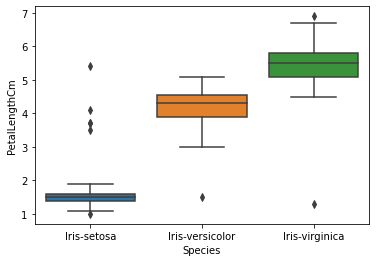

In [ ]:
# Individual feature of dataset through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

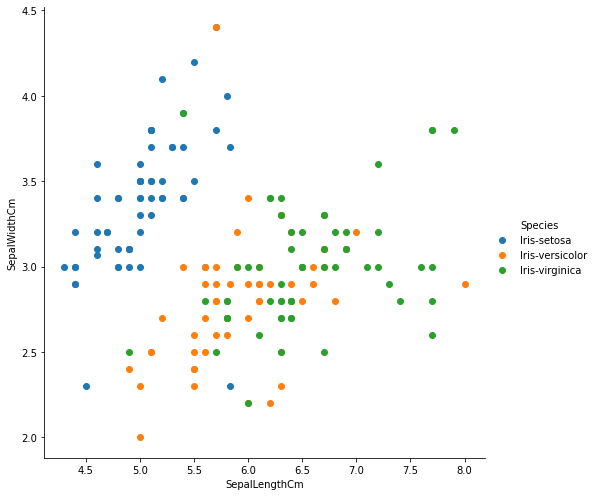

In [ ]:
# Scatterplot
sns.FacetGrid(dataset, hue="Species", height=7).map(plt.scatter,"SepalLengthCm", "SepalWidthCm").add_legend()
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Interquartile range
for column in dataset.columns[1:-1]:
    for specy in dataset["Species"].unique():
        Specy_type = dataset[dataset["Species"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outliers = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outliers)
        dataset.drop(index = outliers, inplace=True) # dropping outliers
        

Int64Index([41, 56, 59], dtype='int64')
Int64Index([91], dtype='int64')
Int64Index([146], dtype='int64')
Int64Index([14, 22, 27, 50, 52, 60], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([19, 43, 54, 55], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([172], dtype='int64')


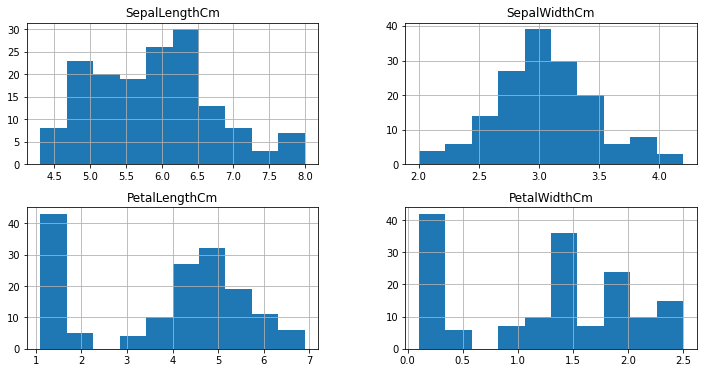

In [ ]:
# histogram
dataset.hist(figsize= (12,6))
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()

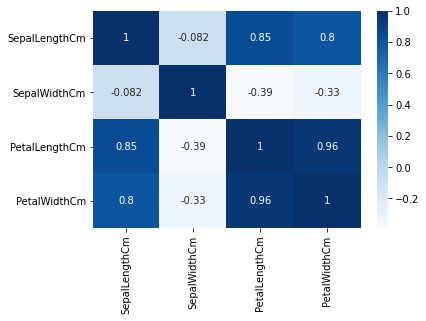

In [ ]:
# Plotting heat map
sns.heatmap(dataset.corr(), cmap="Blues", annot=True)
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
plt.show()